## Regularization

### Agenda
   
    ♦ Problem Description
    ♦ Data Understanding
    ♦ Split the data into Train and Validation sets
    ♦ Build a Multiple linear regression model
    ♦ Build a Ridge Regression model
    ♦ Build a Cross validated - Ridge Regression model and find lambda for ridge
    ♦ Build a Ridge Regression model with best lambda
    ♦ Build a Lasso Regression model
    ♦ Build an Elastic Net Regression model
    



### Problem Description


An online gaming portal wants to understand their customer patterns based on their transactional behavior. 
For this, they have constructed a customer level data based on the details they are tracking. The customer database consists of demographic and transactional information for each customer. Building a regression model to predict 
the customer revenue based on other factors.


### Data Reading

In [1]:
### Read data

data<-read.csv("/home/datasets/lab/CustomerData.csv",stringsAsFactors = T)

### Data Understanding

Check the number of observations and attributes

Classify independent variables and dependent variable

In Linear Regression, the dependent variable is continuous variable.

For Multiple Linear Regression we will predict dependent variable with multiple independent variables.


In [2]:
## Dimensions

dim(data)

[1] 3209   14

In [3]:
## Structure

str(data)

'data.frame':	3209 obs. of  14 variables:
 $ CustomerID                  : int  1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 ...
 $ City                        : int  1 1 1 1 1 1 1 1 1 2 ...
 $ NoOfChildren                : int  2 2 4 1 3 2 3 2 4 3 ...
 $ MinAgeOfChild               : int  3 3 3 6 6 3 8 6 6 5 ...
 $ MaxAgeOfChild               : int  8 6 5 6 9 4 12 8 9 6 ...
 $ Tenure                      : int  210 442 424 261 422 378 369 404 420 333 ...
 $ FrquncyOfPurchase           : int  11 20 18 11 44 16 25 13 20 15 ...
 $ NoOfUnitsPurchased          : int  11 20 18 9 31 16 15 12 16 15 ...
 $ FrequencyOFPlay             : int  2344 245 1059 365 1066 228 75 1488 2743 1967 ...
 $ NoOfGamesPlayed             : int  108 22 130 34 102 12 2 118 163 56 ...
 $ NoOfGamesBought             : int  10 7 18 11 44 16 25 13 16 15 ...
 $ FavoriteChannelOfTransaction: Factor w/ 2 levels "Favorite","Uniform": 2 1 1 1 2 1 1 1 2 1 ...
 $ FavoriteGame                : Factor w/ 2 levels "Favorit

In [4]:
## First few rows

head(data)

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<dbl>
1,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
2,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
3,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
4,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
5,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05
6,1006,1,2,3,4,378,16,16,228,12,16,Favorite,Favorite,150.00


In [5]:
## Last few rows

tail(data)

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<dbl>
3204,4204,1,1,4,4,431,26,26,1166,72,26,Favorite,Uniform,205.00
3205,4205,1,2,4,6,365,16,16,827,78,16,Favorite,Uniform,132.50
3206,4206,1,2,2,5,348,20,20,2933,294,13,Favorite,Uniform,223.23
3207,4207,1,2,5,7,341,16,13,1250,126,16,Uniform,Uniform,120.00
3208,4208,1,2,6,7,368,18,14,1364,122,18,Favorite,Uniform,161.50
3209,4209,1,3,2,6,389,25,17,475,111,25,Favorite,Uniform,137.50


### Summary Statistics

In [6]:
## Summary of the data
summary(data)

   CustomerID        City        NoOfChildren    MinAgeOfChild    
 Min.   :1001   Min.   :1.000   Min.   : 1.000   Min.   :  0.000  
 1st Qu.:1803   1st Qu.:1.000   1st Qu.: 1.000   1st Qu.:  4.000  
 Median :2605   Median :1.000   Median : 2.000   Median :  5.000  
 Mean   :2605   Mean   :1.114   Mean   : 2.128   Mean   :  4.961  
 3rd Qu.:3407   3rd Qu.:1.000   3rd Qu.: 3.000   3rd Qu.:  6.000  
 Max.   :4209   Max.   :2.000   Max.   :11.000   Max.   :113.000  
 MaxAgeOfChild         Tenure      FrquncyOfPurchase NoOfUnitsPurchased
 Min.   :  3.000   Min.   :100.0   Min.   :  1.00    Min.   :  1.00    
 1st Qu.:  6.000   1st Qu.:301.0   1st Qu.: 11.00    1st Qu.: 10.00    
 Median :  7.000   Median :368.0   Median : 14.00    Median : 13.00    
 Mean   :  7.991   Mean   :347.5   Mean   : 16.27    Mean   : 14.68    
 3rd Qu.:  8.000   3rd Qu.:417.0   3rd Qu.: 19.00    3rd Qu.: 17.00    
 Max.   :113.000   Max.   :472.0   Max.   :119.00    Max.   :112.00    
 FrequencyOFPlay NoOfGamesP

#### Drop rows where MaxAgeOfChild and MinAgeOfChild are > 100

In [7]:
data = data[(data$MaxAgeOfChild < 100) & (data$MinAgeOfChild < 100) ,]

In [8]:
summary(data)

   CustomerID        City        NoOfChildren    MinAgeOfChild   
 Min.   :1001   Min.   :1.000   Min.   : 1.000   Min.   : 0.000  
 1st Qu.:1801   1st Qu.:1.000   1st Qu.: 1.000   1st Qu.: 4.000  
 Median :2604   Median :1.000   Median : 2.000   Median : 5.000  
 Mean   :2605   Mean   :1.115   Mean   : 2.125   Mean   : 4.859  
 3rd Qu.:3409   3rd Qu.:1.000   3rd Qu.: 3.000   3rd Qu.: 6.000  
 Max.   :4209   Max.   :2.000   Max.   :11.000   Max.   :18.000  
 MaxAgeOfChild        Tenure      FrquncyOfPurchase NoOfUnitsPurchased
 Min.   : 3.000   Min.   :100.0   Min.   :  1.00    Min.   :  1.00    
 1st Qu.: 6.000   1st Qu.:302.0   1st Qu.: 11.00    1st Qu.: 10.00    
 Median : 7.000   Median :368.0   Median : 14.00    Median : 13.00    
 Mean   : 7.332   Mean   :347.7   Mean   : 16.27    Mean   : 14.68    
 3rd Qu.: 8.000   3rd Qu.:417.0   3rd Qu.: 19.00    3rd Qu.: 17.00    
 Max.   :23.000   Max.   :472.0   Max.   :119.00    Max.   :112.00    
 FrequencyOFPlay NoOfGamesPlayed   NoOfGa

### Split the data into Train and Validation sets

In [9]:
## Split row numbers into 2 sets
set.seed(1)
train_rows = sample(1:nrow(data), size=0.7*nrow(data))
validation_rows = setdiff(1:nrow(data),train_rows)

In [10]:
## Subset into Train and Validation sets
train_data <- data[train_rows,]
validation_data <- data[validation_rows,]

In [11]:
## View the dimensions of the data
dim(data)
dim(train_data)
dim(validation_data)

[1] 3189   14

[1] 2232   14

[1] 957  14

### Data Type Conversion
Check if any data type conversions have to be done.


In [12]:
str(train_data)

'data.frame':	2232 obs. of  14 variables:
 $ CustomerID                  : int  2023 1682 3192 1936 2542 1471 3364 1270 2219 1599 ...
 $ City                        : int  1 1 1 1 1 1 1 2 1 1 ...
 $ NoOfChildren                : int  1 2 2 2 3 5 3 2 2 1 ...
 $ MinAgeOfChild               : int  5 4 4 5 5 1 6 3 5 7 ...
 $ MaxAgeOfChild               : int  5 9 6 7 10 5 21 6 5 7 ...
 $ Tenure                      : int  398 406 313 367 432 464 261 365 187 241 ...
 $ FrquncyOfPurchase           : int  15 8 10 27 24 22 21 13 12 22 ...
 $ NoOfUnitsPurchased          : int  15 8 8 15 20 19 13 13 12 13 ...
 $ FrequencyOFPlay             : int  241 396 370 2161 1413 348 558 2424 476 358 ...
 $ NoOfGamesPlayed             : int  32 45 10 108 127 87 54 69 39 42 ...
 $ NoOfGamesBought             : int  15 8 6 27 24 21 21 13 12 22 ...
 $ FavoriteChannelOfTransaction: Factor w/ 2 levels "Favorite","Uniform": 1 1 2 1 1 2 1 1 1 1 ...
 $ FavoriteGame                : Factor w/ 2 levels "Favorite","Un

In [13]:
str(validation_data)

'data.frame':	957 obs. of  14 variables:
 $ CustomerID                  : int  1001 1002 1006 1018 1020 1021 1024 1025 1030 1031 ...
 $ City                        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ NoOfChildren                : int  2 2 2 1 2 3 1 2 5 1 ...
 $ MinAgeOfChild               : int  3 3 3 7 4 4 4 5 2 7 ...
 $ MaxAgeOfChild               : int  8 6 4 7 7 10 4 7 7 7 ...
 $ Tenure                      : int  210 442 378 346 278 448 189 427 444 126 ...
 $ FrquncyOfPurchase           : int  11 20 16 18 12 6 22 16 26 8 ...
 $ NoOfUnitsPurchased          : int  11 20 16 16 12 6 18 16 26 8 ...
 $ FrequencyOFPlay             : int  2344 245 228 1029 1080 1016 267 3781 7766 515 ...
 $ NoOfGamesPlayed             : int  108 22 12 106 49 56 33 288 583 21 ...
 $ NoOfGamesBought             : int  10 7 16 14 8 6 12 16 26 8 ...
 $ FavoriteChannelOfTransaction: Factor w/ 2 levels "Favorite","Uniform": 2 1 1 2 2 1 1 1 1 1 ...
 $ FavoriteGame                : Factor w/ 2 levels "Favorite","Un

In [14]:
#Convert "City" to factor variable
train_data$City <- as.factor(as.character(train_data$City))
validation_data$City  <- as.factor(as.character(validation_data$City))


In [15]:
str(train_data)

'data.frame':	2232 obs. of  14 variables:
 $ CustomerID                  : int  2023 1682 3192 1936 2542 1471 3364 1270 2219 1599 ...
 $ City                        : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 2 1 1 ...
 $ NoOfChildren                : int  1 2 2 2 3 5 3 2 2 1 ...
 $ MinAgeOfChild               : int  5 4 4 5 5 1 6 3 5 7 ...
 $ MaxAgeOfChild               : int  5 9 6 7 10 5 21 6 5 7 ...
 $ Tenure                      : int  398 406 313 367 432 464 261 365 187 241 ...
 $ FrquncyOfPurchase           : int  15 8 10 27 24 22 21 13 12 22 ...
 $ NoOfUnitsPurchased          : int  15 8 8 15 20 19 13 13 12 13 ...
 $ FrequencyOFPlay             : int  241 396 370 2161 1413 348 558 2424 476 358 ...
 $ NoOfGamesPlayed             : int  32 45 10 108 127 87 54 69 39 42 ...
 $ NoOfGamesBought             : int  15 8 6 27 24 21 21 13 12 22 ...
 $ FavoriteChannelOfTransaction: Factor w/ 2 levels "Favorite","Uniform": 1 1 2 1 1 2 1 1 1 1 ...
 $ FavoriteGame                : Factor w/ 

In [16]:
str(validation_data)

'data.frame':	957 obs. of  14 variables:
 $ CustomerID                  : int  1001 1002 1006 1018 1020 1021 1024 1025 1030 1031 ...
 $ City                        : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ NoOfChildren                : int  2 2 2 1 2 3 1 2 5 1 ...
 $ MinAgeOfChild               : int  3 3 3 7 4 4 4 5 2 7 ...
 $ MaxAgeOfChild               : int  8 6 4 7 7 10 4 7 7 7 ...
 $ Tenure                      : int  210 442 378 346 278 448 189 427 444 126 ...
 $ FrquncyOfPurchase           : int  11 20 16 18 12 6 22 16 26 8 ...
 $ NoOfUnitsPurchased          : int  11 20 16 16 12 6 18 16 26 8 ...
 $ FrequencyOFPlay             : int  2344 245 228 1029 1080 1016 267 3781 7766 515 ...
 $ NoOfGamesPlayed             : int  108 22 12 106 49 56 33 288 583 21 ...
 $ NoOfGamesBought             : int  10 7 16 14 8 6 12 16 26 8 ...
 $ FavoriteChannelOfTransaction: Factor w/ 2 levels "Favorite","Uniform": 2 1 1 2 2 1 1 1 1 1 ...
 $ FavoriteGame                : Factor w/ 

#### Remove columns not used in model building

In [17]:

### Removing ID columns
train_data$CustomerID <- NULL #Remove ID columns as they won't be used in model building
validation_data$CustomerID <- NULL


### Model Building

#### Model

In [18]:
# Build a model with all attributes
lin_reg <- lm(TotalRevenueGenerated~., data = train_data)

In [19]:
## Evaluating the model
library(DMwR)

y_pred_train <- predict(lin_reg,train_data)
y_pred_validation <- predict(lin_reg,validation_data)

regr.eval(train_data$TotalRevenueGenerated,y_pred_train)
regr.eval(validation_data$TotalRevenueGenerated,y_pred_validation)


Loading required package: lattice

Loading required package: grid

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



mae          mse         rmse         mape 
  31.6678662 1904.6450554   43.6422393    0.1918405

mae          mse         rmse         mape 
  30.6130629 1791.5785953   42.3270433    0.1827813

In [20]:
summary(lin_reg)


Call:
lm(formula = TotalRevenueGenerated ~ ., data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-159.47  -26.99   -4.75   21.06  341.93 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          2.711e+01  7.398e+00   3.665 0.000253 ***
City2                                1.127e+01  2.946e+00   3.826 0.000134 ***
NoOfChildren                         5.112e+00  1.240e+00   4.122 3.90e-05 ***
MinAgeOfChild                        4.147e+00  6.826e-01   6.076 1.45e-09 ***
MaxAgeOfChild                       -1.534e+00  4.305e-01  -3.563 0.000375 ***
Tenure                              -1.130e-02  1.072e-02  -1.054 0.291799    
FrquncyOfPurchase                    9.755e+00  5.125e-01  19.032  < 2e-16 ***
NoOfUnitsPurchased                   9.259e+00  3.777e-01  24.513  < 2e-16 ***
FrequencyOFPlay                      3.035e-03  7.354e-04   4.128 3.80e-05 ***
NoOfGamesPlayed                    

## Implementing RIDGE,LASSO and ELASTIC-NET Regression models  

#### Data Preparation

In [21]:
## Converting categorical attributes into dummy variables 

train_dummy_data <- model.matrix(~.,train_data)

In [22]:
## head of data after dummies
head(train_dummy_data)

,(Intercept),City2,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransactionUniform,FavoriteGameUniform,TotalRevenueGenerated
1023,1,0,1,5,5,398,15,15,241,32,15,0,1,145.00
682,1,0,2,4,9,406,8,8,396,45,8,0,1,100.00
2192,1,0,2,4,6,313,10,8,370,10,6,1,1,126.99
936,1,0,2,5,7,367,27,15,2161,108,27,0,1,240.00
1542,1,0,3,5,10,432,24,20,1413,127,24,0,1,187.52
471,1,0,5,1,5,464,22,19,348,87,21,1,1,142.50


In [23]:
## Remove the first column

train_dummy_data <- train_dummy_data[,-1]
head(train_dummy_data)

,City2,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransactionUniform,FavoriteGameUniform,TotalRevenueGenerated
1023,0,1,5,5,398,15,15,241,32,15,0,1,145.00
682,0,2,4,9,406,8,8,396,45,8,0,1,100.00
2192,0,2,4,6,313,10,8,370,10,6,1,1,126.99
936,0,2,5,7,367,27,15,2161,108,27,0,1,240.00
1542,0,3,5,10,432,24,20,1413,127,24,0,1,187.52
471,0,5,1,5,464,22,19,348,87,21,1,1,142.50


In [24]:
## Perform the same steps on validation data

validation_dummy_data <- model.matrix(~.,validation_data)
validation_dummy_data <- validation_dummy_data[,-1]

head(validation_dummy_data)

,City2,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransactionUniform,FavoriteGameUniform,TotalRevenueGenerated
1,0,2,3,8,210,11,11,2344,108,10,1,1,107.51
2,0,2,3,6,442,20,20,245,22,7,0,1,382.40
6,0,2,3,4,378,16,16,228,12,16,0,0,150.00
18,0,1,7,7,346,18,16,1029,106,14,1,1,181.71
20,0,2,4,7,278,12,12,1080,49,8,1,1,182.36
21,0,3,4,10,448,6,6,1016,56,6,0,1,100.00


#### Decouple X and Y

In [25]:
## dimensions
dim(train_dummy_data)

[1] 2232   13

In [26]:
## column names
colnames(train_dummy_data)

[1] "City2"                               "NoOfChildren"                       
 [3] "MinAgeOfChild"                       "MaxAgeOfChild"                      
 [5] "Tenure"                              "FrquncyOfPurchase"                  
 [7] "NoOfUnitsPurchased"                  "FrequencyOFPlay"                    
 [9] "NoOfGamesPlayed"                     "NoOfGamesBought"                    
[11] "FavoriteChannelOfTransactionUniform" "FavoriteGameUniform"                
[13] "TotalRevenueGenerated"

In [27]:
## Split X and Y
train_x <- train_dummy_data[,-13]
train_y <- train_dummy_data[,13]

validation_x <- validation_dummy_data[,-13]
validation_y <- validation_dummy_data[,13]


## Ridge, Lasso and Elastic Net

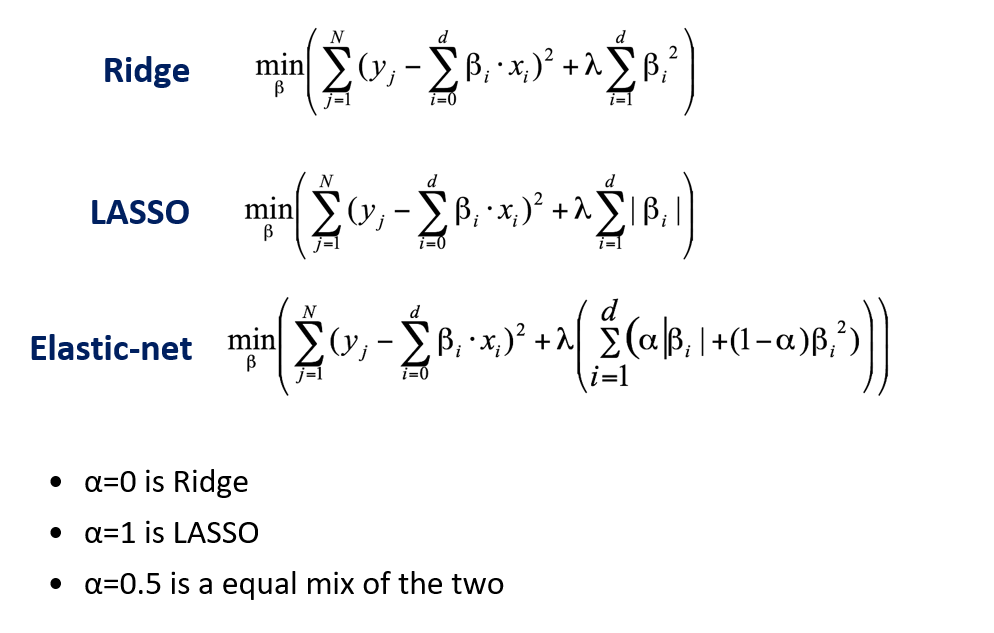

### Ridge Regression

Loading required package: Matrix

Loaded glmnet 4.0-2



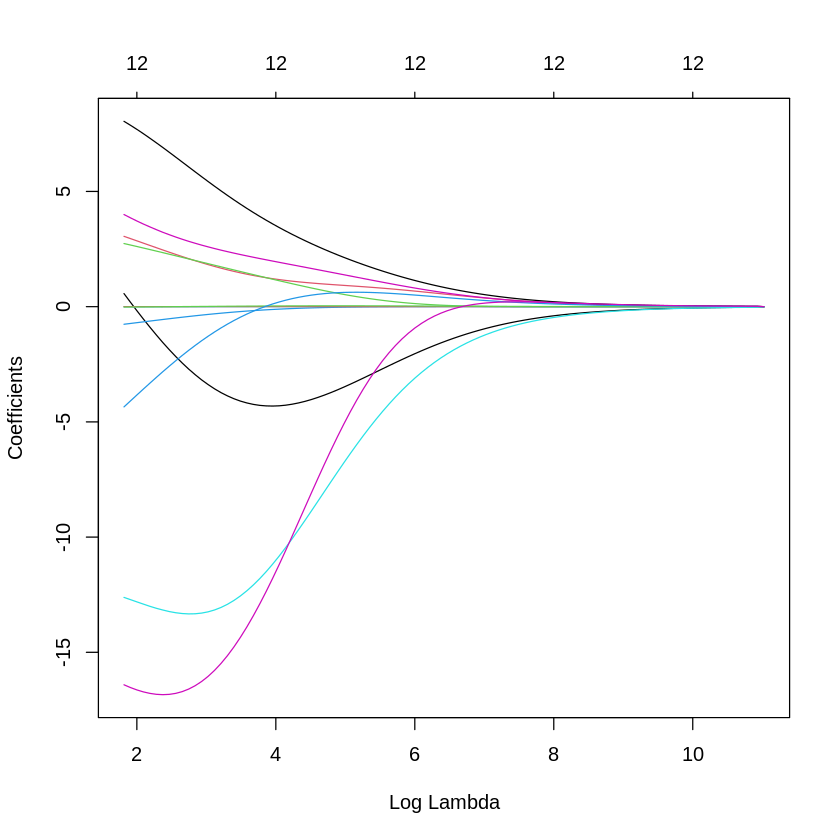

In [28]:
## Build a ridge regression model
library(glmnet)

ridge_model <- glmnet(train_x,train_y,alpha = 0)

## plot the model
plot(ridge_model,xvar="lambda")

In [29]:
## lambda values
ridge_model$lambda

[1] 61413.168150 55957.391559 50986.291122 46456.809547 42329.714631
  [6] 38569.259452 35142.872746 32020.876792 29176.230354 26584.294465
 [11] 24222.619016 22070.748305 20110.043857 18323.522988 16695.711709
 [16] 15212.510697 13861.073175 12629.693638 11507.706465 10485.393540
 [21]  9553.900078  8705.157927  7931.815690  7227.175046  6585.132734
 [26]  6000.127692  5467.092886  4981.411422  4538.876561  4135.655277
 [31]  3768.255061  3433.493668  3128.471554  2850.546763  2597.312046
 [36]  2366.574002  2156.334091  1964.771313  1790.226445  1631.187662
 [41]  1486.277446  1354.240654  1233.933647  1124.314383  1024.433392
 [46]   933.425553   850.502599   774.946293   706.102200   643.374027
 [51]   586.218451   534.140420   486.688857   443.452760   404.057639
 [56]   368.162272   335.455751   305.654787   278.501258   253.759974
 [61]   231.216637   210.675988   191.960114   174.906907   159.368659
 [66]   145.210787   132.310661   120.556546   109.846635   100.088163
 [71]    91.196606    83.094951    75.713025    68.986888    62.858283
 [76]    57.274127    52.186051    47.549986    43.325776    39.476834
 [81]    35.969821    32.774361    29.862777    27.209850    24.792602
 [86]    22.590096    20.583254    18.754694    17.088579    15.570477
 [91]    14.187238    12.926883    11.778495    10.732126     9.778713
 [96]     8.909999     8.118459     7.397238     6.740088     6.141317

In [30]:
## Log lambda values
log(ridge_model$lambda)

[1] 11.025380 10.932346 10.839312 10.746278 10.653245 10.560211 10.467177
  [8] 10.374143 10.281110 10.188076 10.095042 10.002008  9.908975  9.815941
 [15]  9.722907  9.629873  9.536840  9.443806  9.350772  9.257738  9.164705
 [22]  9.071671  8.978637  8.885604  8.792570  8.699536  8.606502  8.513469
 [29]  8.420435  8.327401  8.234367  8.141334  8.048300  7.955266  7.862232
 [36]  7.769199  7.676165  7.583131  7.490097  7.397064  7.304030  7.210996
 [43]  7.117962  7.024929  6.931895  6.838861  6.745827  6.652794  6.559760
 [50]  6.466726  6.373693  6.280659  6.187625  6.094591  6.001558  5.908524
 [57]  5.815490  5.722456  5.629423  5.536389  5.443355  5.350321  5.257288
 [64]  5.164254  5.071220  4.978186  4.885153  4.792119  4.699085  4.606051
 [71]  4.513018  4.419984  4.326950  4.233916  4.140883  4.047849  3.954815
 [78]  3.861781  3.768748  3.675714  3.582680  3.489647  3.396613  3.303579
 [85]  3.210545  3.117512  3.024478  2.931444  2.838410  2.745377  2.652343
 [92]  2.559309  2.466275  2.373242  2.280208  2.187174  2.094140  2.001107
 [99]  1.908073  1.815039

## Cross validation

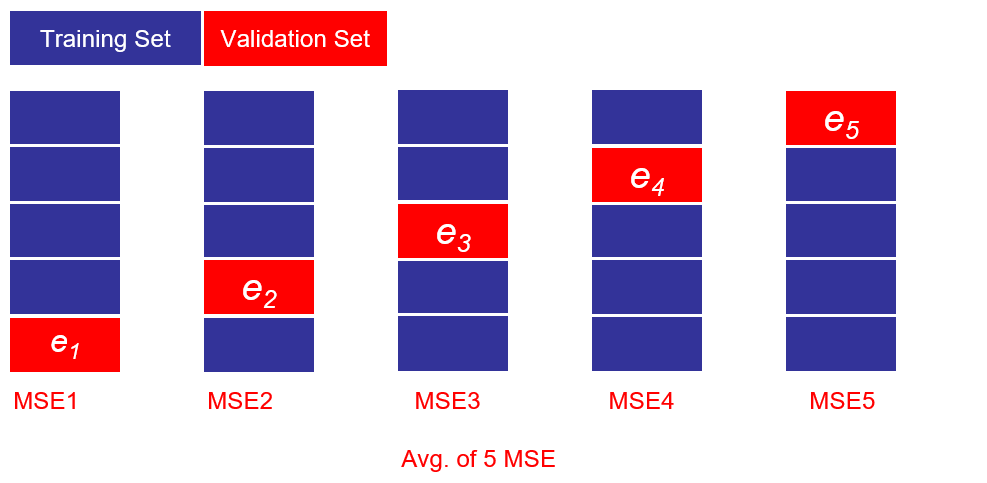

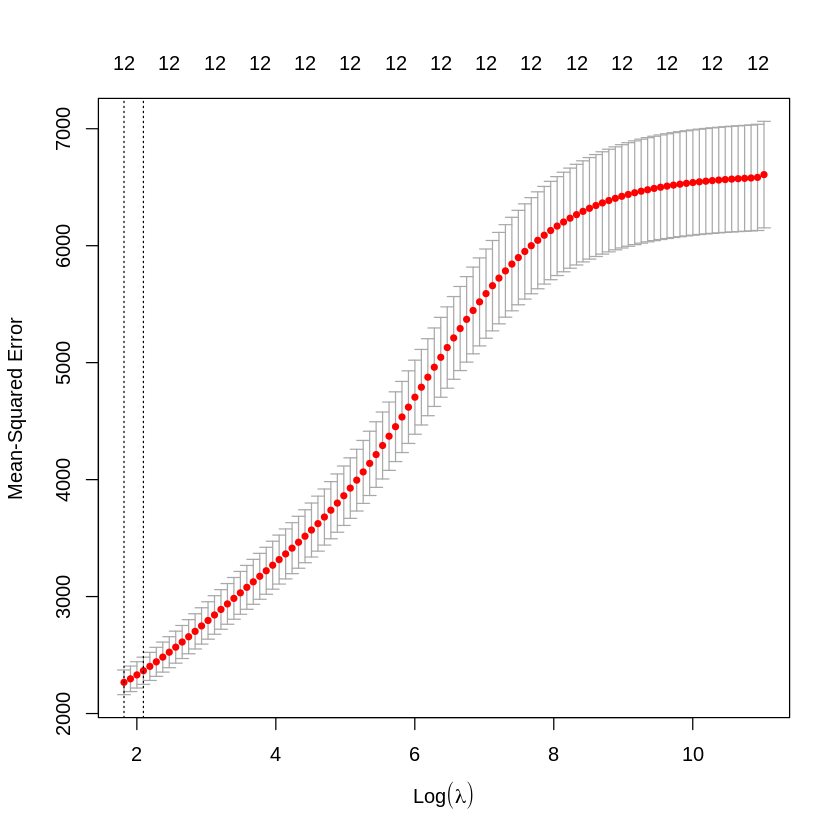

In [31]:
## Model Selection with CV
set.seed(1)
ridge_model_cv <- cv.glmnet(train_x,train_y,alpha=0,nfolds = 10)

## Plot
plot(ridge_model_cv)

In [32]:
## log lambda with min average mse value
log(ridge_model_cv$lambda.min)

[1] 1.815039

In [33]:
## 1 standard error from min average mse value 

log(ridge_model_cv$lambda.1se)

[1] 2.09414

In [34]:
## Prediction on train and validation
y_pred_train_ridge_cv <- predict(ridge_model_cv,train_x)
y_pred_validation_ridge_cv <- predict(ridge_model_cv,validation_x)

## Evaluation on train and validation
regr.eval(train_y,y_pred_train_ridge_cv)
regr.eval(validation_y, y_pred_validation_ridge_cv)


mae         mse        rmse        mape 
  33.866251 2332.233947   48.293208    0.201359

mae          mse         rmse         mape 
  33.7809361 2498.8234015   49.9882326    0.1963591

#### Build model with custom lambda

In [35]:
## Set a custom lambda

ridge_model_new_lambda <- glmnet(train_x,train_y,alpha = 0,lambda = ridge_model_cv$lambda.1se)

In [36]:
## Predict and evaluate

y_pred_train_ridge_new_lambda <- predict(ridge_model_new_lambda,train_x)
y_pred_validation_ridge_new_lambda <- predict(ridge_model_new_lambda,validation_x)

regr.eval(train_y,y_pred_train_ridge_new_lambda)
regr.eval(validation_y, y_pred_validation_ridge_new_lambda)


mae          mse         rmse         mape 
  33.8675331 2332.3435619   48.2943430    0.2013676

mae          mse         rmse         mape 
  33.7835474 2499.1549021   49.9915483    0.1963713

#### Coefficients

In [37]:
##  Coefficients of vanilla linear regression 

coef(lin_reg)

(Intercept)                               City2 
                       27.110367981                        11.272120411 
                       NoOfChildren                       MinAgeOfChild 
                        5.111928980                         4.147084656 
                      MaxAgeOfChild                              Tenure 
                       -1.533787277                        -0.011302181 
                  FrquncyOfPurchase                  NoOfUnitsPurchased 
                        9.754843374                         9.259007631 
                    FrequencyOFPlay                     NoOfGamesPlayed 
                        0.003035429                        -0.035795220 
                    NoOfGamesBought FavoriteChannelOfTransactionUniform 
                      -10.741367557                       -13.094444880 
                FavoriteGameUniform 
                      -11.612631310

In [38]:
##  Coefficients of ridge regression

coef(ridge_model_new_lambda)

13 x 1 sparse Matrix of class "dgCMatrix"
                                               s0
(Intercept)                          56.785804886
City2                                -0.546726365
NoOfChildren                          2.754861538
MinAgeOfChild                         2.544023155
MaxAgeOfChild                        -0.659537446
Tenure                               -0.007024658
FrquncyOfPurchase                     3.573569656
NoOfUnitsPurchased                    7.514229441
FrequencyOFPlay                       0.002463148
NoOfGamesPlayed                      -0.009617430
NoOfGamesBought                      -3.570982436
FavoriteChannelOfTransactionUniform -12.893943617
FavoriteGameUniform                 -16.719420547

### Lasso

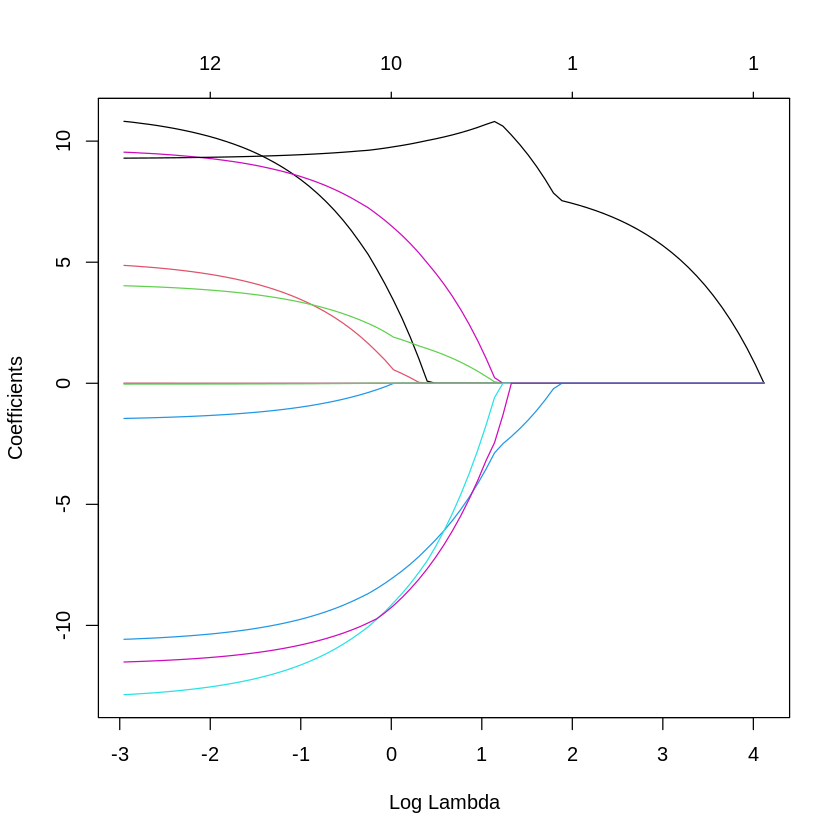

In [39]:
## Build lasso model
lasso_model <- glmnet(train_x,train_y,alpha = 1)

## plot
plot(lasso_model,xvar="lambda")

In [40]:
## lambda values
lasso_model$lambda

[1] 61.41316815 55.95739156 50.98629112 46.45680955 42.32971463 38.56925945
 [7] 35.14287275 32.02087679 29.17623035 26.58429446 24.22261902 22.07074830
[13] 20.11004386 18.32352299 16.69571171 15.21251070 13.86107318 12.62969364
[19] 11.50770647 10.48539354  9.55390008  8.70515793  7.93181569  7.22717505
[25]  6.58513273  6.00012769  5.46709289  4.98141142  4.53887656  4.13565528
[31]  3.76825506  3.43349367  3.12847155  2.85054676  2.59731205  2.36657400
[37]  2.15633409  1.96477131  1.79022645  1.63118766  1.48627745  1.35424065
[43]  1.23393365  1.12431438  1.02443339  0.93342555  0.85050260  0.77494629
[49]  0.70610220  0.64337403  0.58621845  0.53414042  0.48668886  0.44345276
[55]  0.40405764  0.36816227  0.33545575  0.30565479  0.27850126  0.25375997
[61]  0.23121664  0.21067599  0.19196011  0.17490691  0.15936866  0.14521079
[67]  0.13231066  0.12055655  0.10984663  0.10008816  0.09119661  0.08309495
[73]  0.07571302  0.06898689  0.06285828  0.05727413  0.05218605

In [41]:
## log lambda values

log(lasso_model$lambda)

[1]  4.11762428  4.02459054  3.93155680  3.83852305  3.74548931  3.65245557
 [7]  3.55942183  3.46638809  3.37335435  3.28032061  3.18728687  3.09425313
[13]  3.00121938  2.90818564  2.81515190  2.72211816  2.62908442  2.53605068
[19]  2.44301694  2.34998320  2.25694946  2.16391572  2.07088197  1.97784823
[25]  1.88481449  1.79178075  1.69874701  1.60571327  1.51267953  1.41964579
[31]  1.32661205  1.23357830  1.14054456  1.04751082  0.95447708  0.86144334
[37]  0.76840960  0.67537586  0.58234212  0.48930838  0.39627464  0.30324089
[43]  0.21020715  0.11717341  0.02413967 -0.06889407 -0.16192781 -0.25496155
[49] -0.34799529 -0.44102903 -0.53406278 -0.62709652 -0.72013026 -0.81316400
[55] -0.90619774 -0.99923148 -1.09226522 -1.18529896 -1.27833270 -1.37136644
[61] -1.46440019 -1.55743393 -1.65046767 -1.74350141 -1.83653515 -1.92956889
[67] -2.02260263 -2.11563637 -2.20867011 -2.30170385 -2.39473760 -2.48777134
[73] -2.58080508 -2.67383882 -2.76687256 -2.85990630 -2.95294004

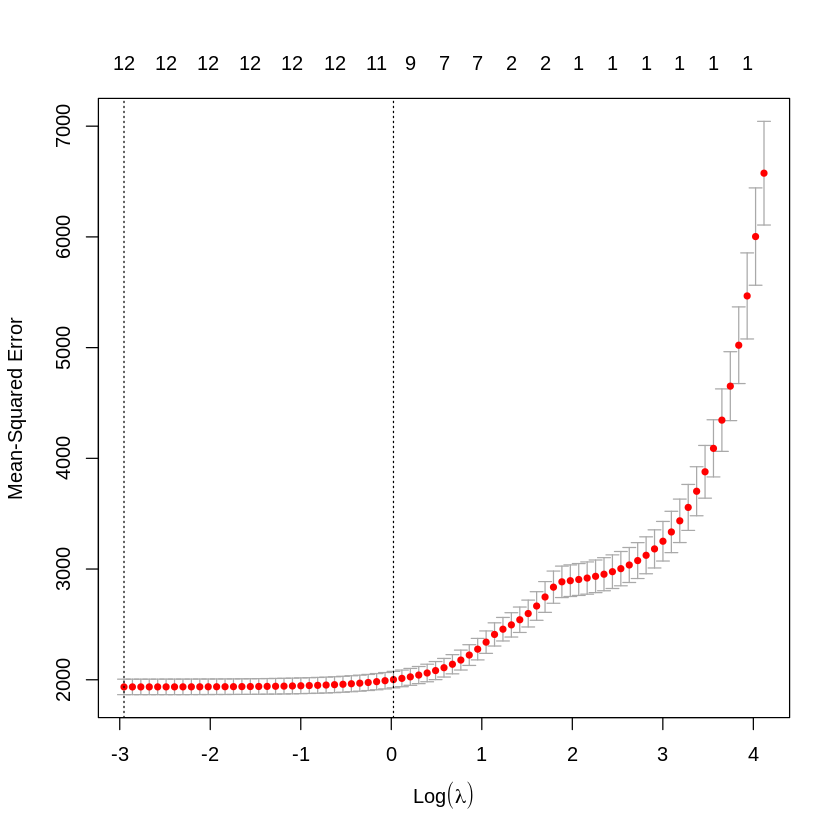

In [42]:
## Lasso Model Selection with CV
set.seed(1)
lasso_model_cv <- cv.glmnet(train_x,train_y,alpha=1,nfolds = 10)

## Plot
plot(lasso_model_cv)

In [43]:
## log lambda with min average mse value

log(lasso_model_cv$lambda.min)

[1] -2.95294

In [44]:
## 1 standard error from min average mse value 

log(lasso_model_cv$lambda.1se)

[1] 0.02413967

In [45]:
## Prediction and evaluation on train and validation
y_pred_train_lasso_cv <- predict(lasso_model_cv,train_x)
y_pred_validation_lasso_cv <- predict(lasso_model_cv,validation_x)


regr.eval(train_y,y_pred_train_lasso_cv)
regr.eval(validation_y, y_pred_validation_lasso_cv)



mae          mse         rmse         mape 
  32.0540647 1979.2953829   44.4892727    0.1925554

mae          mse         rmse         mape 
  31.1076606 1940.7056220   44.0534405    0.1842615

In [46]:
## Coef of vanilla linear regression
coef(lin_reg)

(Intercept)                               City2 
                       27.110367981                        11.272120411 
                       NoOfChildren                       MinAgeOfChild 
                        5.111928980                         4.147084656 
                      MaxAgeOfChild                              Tenure 
                       -1.533787277                        -0.011302181 
                  FrquncyOfPurchase                  NoOfUnitsPurchased 
                        9.754843374                         9.259007631 
                    FrequencyOFPlay                     NoOfGamesPlayed 
                        0.003035429                        -0.035795220 
                    NoOfGamesBought FavoriteChannelOfTransactionUniform 
                      -10.741367557                       -13.094444880 
                FavoriteGameUniform 
                      -11.612631310

In [47]:
## Lasso Coef

coef(lasso_model_cv)

13 x 1 sparse Matrix of class "dgCMatrix"
                                               1
(Intercept)                         36.050446093
City2                                3.421879593
NoOfChildren                         0.557988057
MinAgeOfChild                        1.904969445
MaxAgeOfChild                       -0.005578040
Tenure                               .          
FrquncyOfPurchase                    6.424995971
NoOfUnitsPurchased                   9.765869662
FrequencyOFPlay                      0.001323025
NoOfGamesPlayed                      .          
NoOfGamesBought                     -8.011589143
FavoriteChannelOfTransactionUniform -9.064690223
FavoriteGameUniform                 -9.183081651

## Elastic net

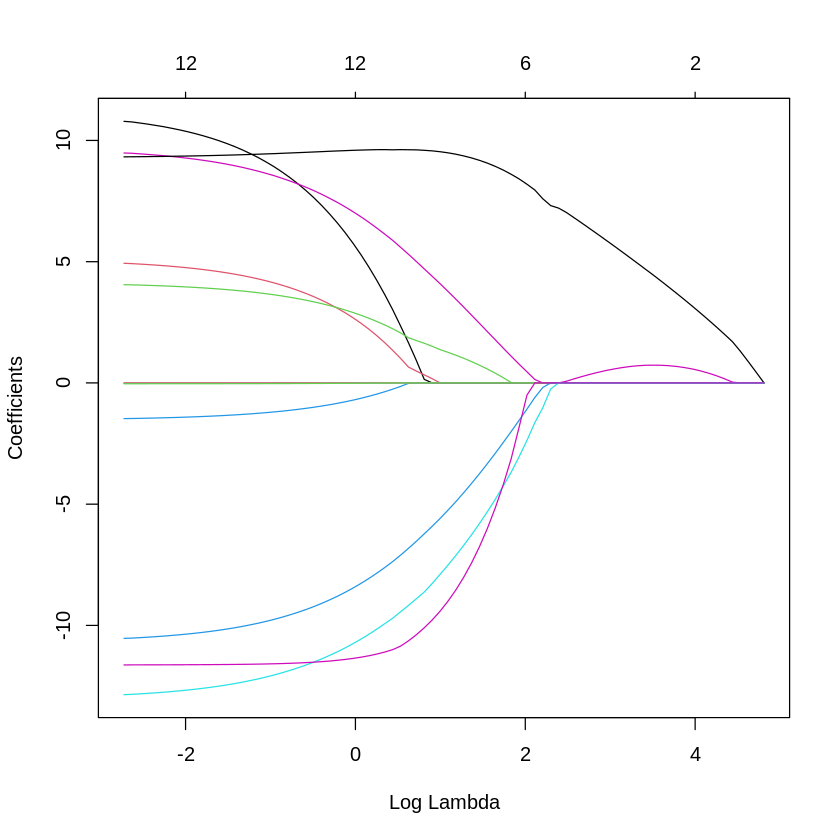

In [48]:
## Build an elastic net model with 0.5 as alpha

elastic_model <- glmnet(train_x,train_y,alpha = 0.5)

## Plot
plot(elastic_model,xvar="lambda")

In [49]:
## lambda
elastic_model$lambda

[1] 122.82633630 111.91478312 101.97258224  92.91361909  84.65942926
 [6]  77.13851890  70.28574549  64.04175358  58.35246071  53.16858893
[11]  48.44523803  44.14149661  40.22008771  36.64704598  33.39142342
[16]  30.42502139  27.72214635  25.25938728  23.01541293  20.97078708
[21]  19.10780016  17.41031585  15.86363138  14.45435009  13.17026547
[26]  12.00025538  10.93418577   9.96282284   9.07775312   8.27131055
[31]   7.53651012   6.86698734   6.25694311   5.70109353   5.19462409
[36]   4.73314800   4.31266818   3.92954263   3.58045289   3.26237532
[41]   2.97255489   2.70848131   2.46786729   2.24862877   2.04886678
[46]   1.86685111   1.70100520   1.54989259   1.41220440   1.28674805
[51]   1.17243690   1.06828084   0.97337771   0.88690552   0.80811528
[56]   0.73632454   0.67091150   0.61130957   0.55700252   0.50751995
[61]   0.46243327   0.42135198   0.38392023   0.34981381   0.31873732
[66]   0.29042157   0.26462132   0.24111309   0.21969327   0.20017633
[71]   0.18239321   0.16618990   0.15142605   0.13797378   0.12571657
[76]   0.11454825   0.10437210   0.09509997   0.08665155   0.07895367
[81]   0.07193964   0.06554872

In [50]:
## log lambda
log(elastic_model$lambda)

[1]  4.81077146  4.71773772  4.62470398  4.53167023  4.43863649  4.34560275
 [7]  4.25256901  4.15953527  4.06650153  3.97346779  3.88043405  3.78740031
[13]  3.69436657  3.60133282  3.50829908  3.41526534  3.32223160  3.22919786
[19]  3.13616412  3.04313038  2.95009664  2.85706290  2.76402915  2.67099541
[25]  2.57796167  2.48492793  2.39189419  2.29886045  2.20582671  2.11279297
[31]  2.01975923  1.92672549  1.83369174  1.74065800  1.64762426  1.55459052
[37]  1.46155678  1.36852304  1.27548930  1.18245556  1.08942182  0.99638807
[43]  0.90335433  0.81032059  0.71728685  0.62425311  0.53121937  0.43818563
[49]  0.34515189  0.25211815  0.15908441  0.06605066 -0.02698308 -0.12001682
[55] -0.21305056 -0.30608430 -0.39911804 -0.49215178 -0.58518552 -0.67821926
[61] -0.77125300 -0.86428675 -0.95732049 -1.05035423 -1.14338797 -1.23642171
[67] -1.32945545 -1.42248919 -1.51552293 -1.60855667 -1.70159042 -1.79462416
[73] -1.88765790 -1.98069164 -2.07372538 -2.16675912 -2.25979286 -2.35282660
[79] -2.44586034 -2.53889408 -2.63192783 -2.72496157

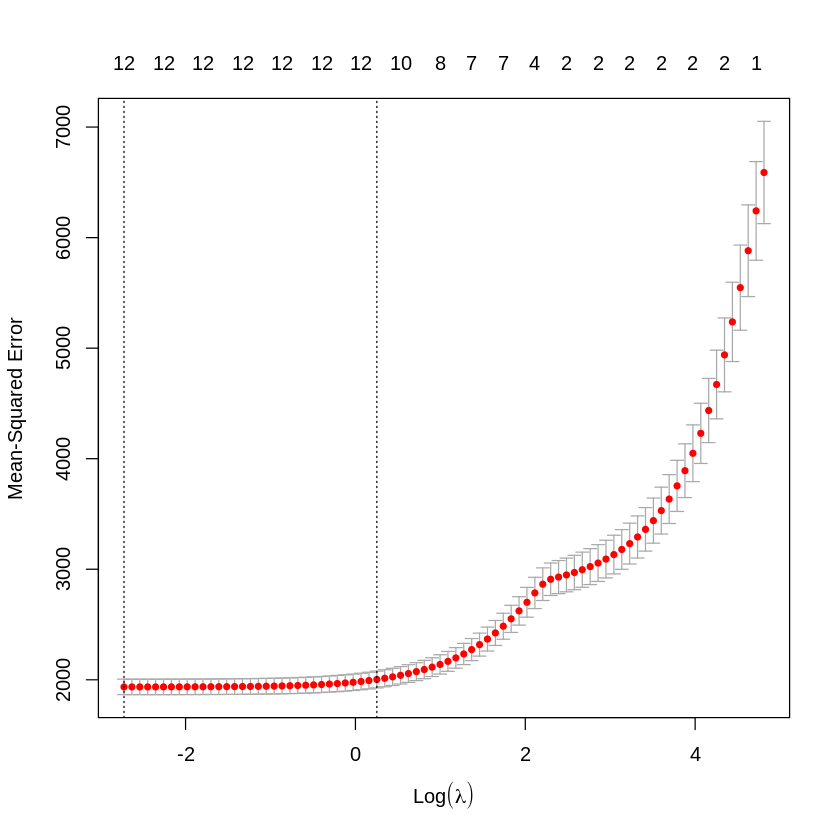

In [51]:
## Elastic net Model Selection
set.seed(1)
elastic_model_cv <- cv.glmnet(train_x,train_y,alpha=0.5,nfolds = 10)

## Plot
plot(elastic_model_cv)

In [52]:
## Log Lambda of min average error

log(elastic_model_cv$lambda.min)

[1] -2.724962

In [53]:
## log lambda 1 se from min average error

log(elastic_model_cv$lambda.1se)

[1] 0.2521181

In [54]:
## Prediction and validation on train and validation
y_pred_train_elastic_cv <- predict(elastic_model_cv,train_x)
y_pred_validation_elastic_cv <- predict(elastic_model_cv,validation_x)


regr.eval(train_y,y_pred_train_elastic_cv)
regr.eval(validation_y, y_pred_validation_elastic_cv)



mae          mse         rmse         mape 
  31.9742470 1974.7364676   44.4380070    0.1920834

mae          mse         rmse         mape 
  31.1275762 1948.7219760   44.1443312    0.1842063

In [55]:
# Coef of vanilla linear regression

coef(lin_reg)

(Intercept)                               City2 
                       27.110367981                        11.272120411 
                       NoOfChildren                       MinAgeOfChild 
                        5.111928980                         4.147084656 
                      MaxAgeOfChild                              Tenure 
                       -1.533787277                        -0.011302181 
                  FrquncyOfPurchase                  NoOfUnitsPurchased 
                        9.754843374                         9.259007631 
                    FrequencyOFPlay                     NoOfGamesPlayed 
                        0.003035429                        -0.035795220 
                    NoOfGamesBought FavoriteChannelOfTransactionUniform 
                      -10.741367557                       -13.094444880 
                FavoriteGameUniform 
                      -11.612631310

In [56]:
# Coef of elastic net model with alpha = 0.5

coef(elastic_model_cv)

13 x 1 sparse Matrix of class "dgCMatrix"
                                                1
(Intercept)                          36.617267551
City2                                 4.226828966
NoOfChildren                          1.947449355
MinAgeOfChild                         2.533613131
MaxAgeOfChild                        -0.461037676
Tenure                               -0.002491417
FrquncyOfPurchase                     6.384140372
NoOfUnitsPurchased                    9.619323134
FrequencyOFPlay                       0.001778002
NoOfGamesPlayed                      -0.007560961
NoOfGamesBought                      -7.845198188
FavoriteChannelOfTransactionUniform -10.152360542
FavoriteGameUniform                 -11.182737268

### Elastic Net different Alpha

In [59]:
## Build elastic net with different alphas

elastic_0.2    <- glmnet(train_x, train_y, alpha = 0.2) 
elastic_0.4    <- glmnet(train_x, train_y, alpha = 0.4) 
elastic_0.6 <- glmnet(train_x, train_y, alpha = 0.6) 
elastic_0.8 <- glmnet(train_x, train_y, alpha = 0.8) 

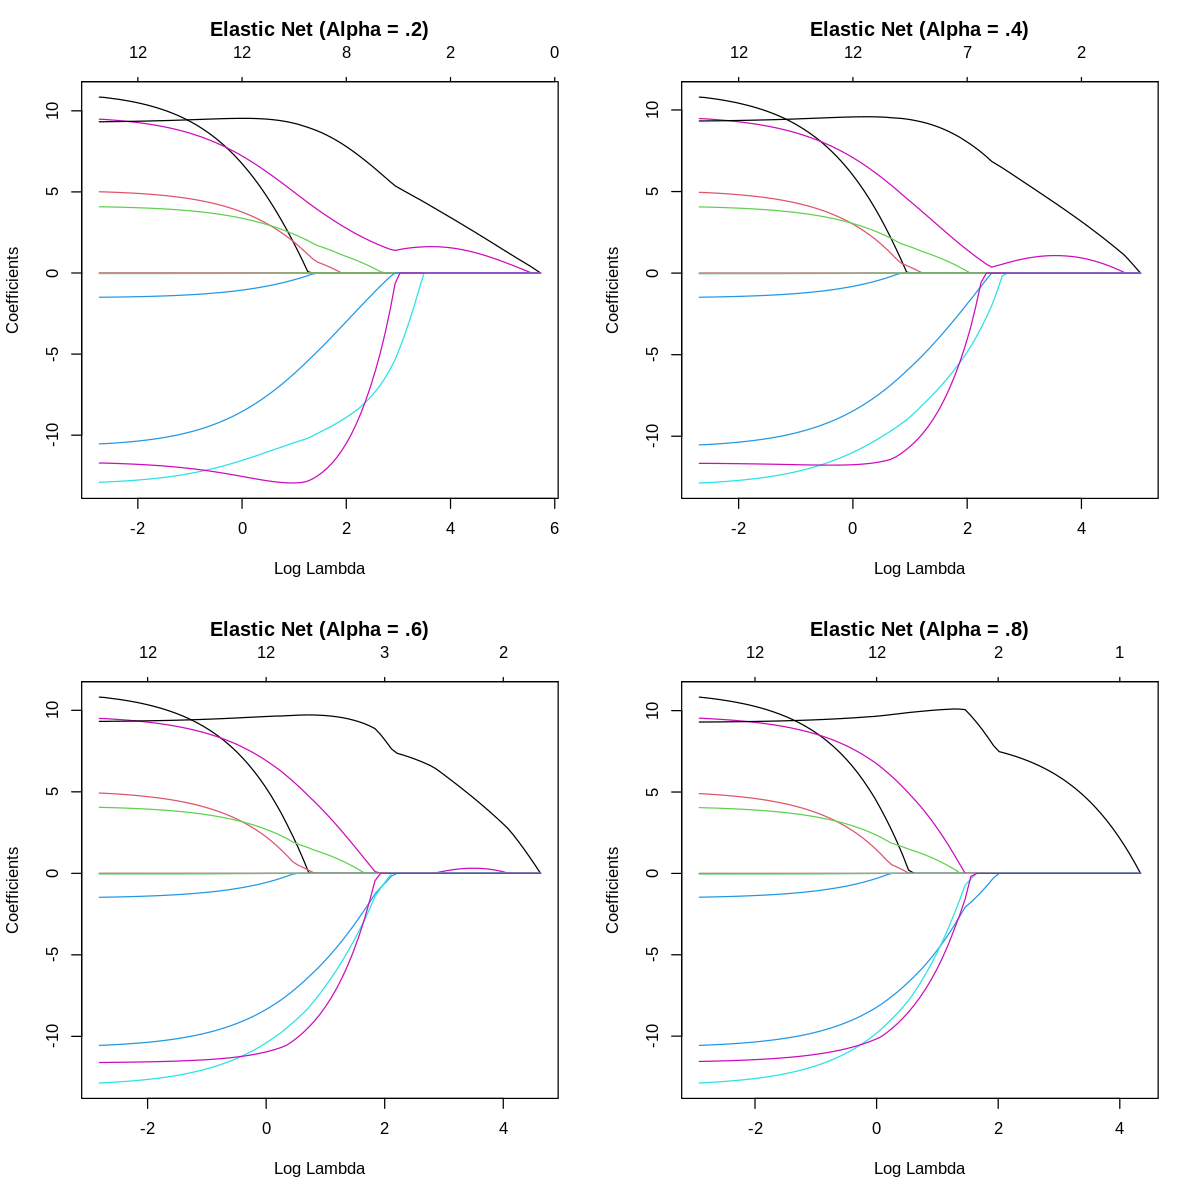

In [60]:
## Plot
par(mfrow = c(2, 2))

options(repr.plot.width = 10 , repr.plot.height = 10)

plot(elastic_0.2, xvar = "lambda", main = "Elastic Net (Alpha = .2)\n")
plot(elastic_0.4, xvar = "lambda", main = "Elastic Net (Alpha = .4)\n")
plot(elastic_0.6, xvar = "lambda", main = "Elastic Net (Alpha = .6)\n")
plot(elastic_0.8, xvar = "lambda", main = "Elastic Net (Alpha = .8)\n")

#### Iterating with different alpha values

In [61]:
## create a vector with different alpha values
alpha_list = seq(0.0, 1.0, by = 0.1)

In [62]:
alpha_list

[1] 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0

In [63]:
## Build model with those alpha values and 

for(alpha_val in alpha_list) {
  
    set.seed(1)
    # fit CV model for each alpha value
    model <- cv.glmnet(train_x, train_y, alpha = alpha_val)
    
    y_pred_train <- predict(model,train_x)
    y_pred_validation <- predict(model,validation_x)

    eval_train = regr.eval(train_y,y_pred_train)
    eval_validation = regr.eval(validation_y, y_pred_validation)

    
    # extract MSE and lambda values
    cat("Alpha: ",alpha_val," lambda: ",model$lambda.1se,
    " Train MAPE: ",eval_train[4]," Validation MAPE: ",eval_validation[4],"\n")

}


Alpha:  0  lambda:  8.118459  Train MAPE:  0.201359  Validation MAPE:  0.1963591 
Alpha:  0.1  lambda:  1.593687  Train MAPE:  0.1918817  Validation MAPE:  0.1845396 
Alpha:  0.2  lambda:  1.528274  Train MAPE:  0.1919003  Validation MAPE:  0.1844706 
Alpha:  0.3  lambda:  1.346859  Train MAPE:  0.1918142  Validation MAPE:  0.1841432 
Alpha:  0.4  lambda:  1.335351  Train MAPE:  0.1919641  Validation MAPE:  0.1842059 
Alpha:  0.5  lambda:  1.286748  Train MAPE:  0.1920834  Validation MAPE:  0.1842063 
Alpha:  0.6  lambda:  1.176837  Train MAPE:  0.1920929  Validation MAPE:  0.1840213 
Alpha:  0.7  lambda:  1.107066  Train MAPE:  0.192152  Validation MAPE:  0.1839303 
Alpha:  0.8  lambda:  1.063128  Train MAPE:  0.1922781  Validation MAPE:  0.1839536 
Alpha:  0.9  lambda:  1.03714  Train MAPE:  0.192397  Validation MAPE:  0.1840515 
Alpha:  1  lambda:  1.024433  Train MAPE:  0.1925554  Validation MAPE:  0.1842615 
